#  *EE559 Project Assignment* 
##  *Student Perfromance Dataset / Classification*

###   Imports

In [83]:
from sklearn.linear_model import Perceptron
from sklearn.neighbors import NearestCentroid
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns

#### Functions

In [62]:
# Fucntion to convert scores to grades
def get_grade(score): 
    if score <= 9:
        grade = 0 #F
    elif 10<=score<=11:
        grade = 1 #D
    elif 12<=score<=13:
        grade = 2 #C
    elif 14<=score<=15:
        grade = 3 #B
    elif score>=16:
        grade = 4 #A
    
    return grade

# Trivial classifier - randomly outputs class labels with probability based on class priors
def trivial_classifier(Y_train, data):
    y_grades_train = list()
    for i in range(len(Y_train)):
        y_grades_train.append(get_grade(Y_train[i]))
    y_grades_train = np.array(y_grades_train)
    weights = [np.count_nonzero(y_grades_train == 0)/len(Y_train)*100, np.count_nonzero(y_grades_train == 1)/len(Y_train)*100,
    np.count_nonzero(y_grades_train == 2)/len(Y_train)*100, np.count_nonzero(y_grades_train == 3)/len(Y_train)*100,
    np.count_nonzero(y_grades_train == 4)/len(Y_train)*100]
    y_pred = list()
    for i in range(len(data)):
        pred_class = 0
        for j in range(10):
            gradelist = [0, 1, 2, 3, 4]
            pred_class += random.choices(gradelist, weights=weights)[0]
        y_pred.append(round(pred_class/10))
    return np.array(y_pred)

# Baseline Model - Nearest Means Classifier
def nearestMeansClassifier(X_train, Y_train, X_test):
    y_grades_train = list()
    for i in range(len(Y_train)):
        y_grades_train.append(get_grade(Y_train[i]))
    y_grades_train = np.array(y_grades_train)
    clf = NearestCentroid()
    clf.fit(X_train, y_grades_train)
    Y_test_grades_pred = np.zeros(len(X_test))
    for i in range(len(X_test)):
        Y_test_grades_pred[i] = clf.predict(X_test[i].reshape(1, -1))
    
    return Y_test_grades_pred

# Performance Measures
def get_performance(y, y_pred):
    macro_f1_score = f1_score(Y_test_grades_actual, Y_test_grades_pred, average = 'macro')
    print("The macro F1 score for the trivial classifier is - ", macro_f1_score)
    accuracy = f1_score(Y_test_grades_actual, Y_test_grades_pred, average = 'micro')
    print("The accuracy for the trivial classifier is - ", accuracy)
    cf_matrix = confusion_matrix(y, y_pred)
    labels = ['F', 'D', 'C', 'B', 'A']
    ax = sns.heatmap(cf_matrix, annot=True)
    ax.set_xticklabels(labels)
    ax.set_yticklabels(labels)
    plt.show()

    
        

### Read in the data

In [63]:
train_df = pd.read_csv('data/student_performance_test.csv')
#dataset_train = train_df.to_numpy()

In [64]:
train_df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

### **Problem 1**
- Predict first-period academic performance without any prior academic performance data: remove the G2 and G3 columns from the original dataset, then predict G1.

##### Removing categorical non-binary features and grades. 

In [65]:
selected_columns = train_df.loc[:, ~train_df.columns.isin(['Mjob', 'Fjob', 'reason', 'gaurdian', 'G1', 'G2', 'G3'])]
binary_vals = pd.get_dummies(selected_columns)
X_train = binary_vals.to_numpy() #Converting to numpy array for easier processing

In [66]:
y_train = train_df.loc[:, train_df.columns.isin(['G1'])] #Rerun this cell to get back orginal values of Y_train
Y_train = y_train['G1'].to_numpy()
y_grades_train = list()
for i in range(len(Y_train)):
    y_grades_train.append(get_grade(Y_train[i]))
y_grades_train = np.array(y_grades_train)

##### Reading in test data and processing it

In [67]:
test_df = pd.read_csv('data/student_performance_test.csv')
selected_columns = test_df.loc[:, ~test_df.columns.isin(['Mjob', 'Fjob', 'reason', 'gaurdian', 'G1', 'G2', 'G3'])]
binary_vals = pd.get_dummies(selected_columns)
X_test = binary_vals.to_numpy()

In [68]:
y_test = test_df.loc[:, test_df.columns.isin(['G1'])] #Rerun this cell to get back orginal values of Y_test
Y_test = y_test['G1'].to_numpy()
y_grades_test_actual = list()
for i in range(len(Y_test)):
    y_grades_test_actual.append(get_grade(Y_test[i]))
Y_test_grades_actual = np.array(y_grades_test_actual)

#### **Trivial System**

The macro F1 score for the trivial classifier is -  0.1442857142857143
The accuracy for the trivial classifier is -  0.2822085889570552


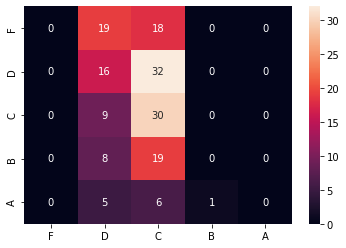

In [72]:
Y_test_grades_pred = trivial_classifier(Y_train, X_test)
get_performance(Y_test_grades_actual, Y_test_grades_pred) 

#### **Reference System - Nearest Means**

The macro F1 score for the trivial classifier is -  0.25381269372066273
The accuracy for the trivial classifier is -  0.26380368098159507


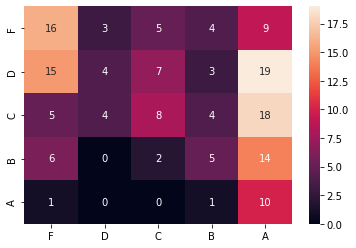

In [71]:
Y_test_grades_pred = nearestMeansClassifier(X_train, Y_train, X_test)
get_performance(Y_test_grades_actual, Y_test_grades_pred)

##### Normalizing Data and encoding categorical data

In [79]:
selected_columns = train_df.loc[:, ~train_df.columns.isin(['G1', 'G2', 'G3'])]
binary_vals = pd.get_dummies(selected_columns)
X_train = binary_vals.to_numpy()
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)

In [80]:
test_df = pd.read_csv('data/student_performance_test.csv')
selected_columns = test_df.loc[:, ~test_df.columns.isin(['G1', 'G2', 'G3'])]
binary_vals = pd.get_dummies(selected_columns)
X_test = binary_vals.to_numpy()
scaler = StandardScaler().fit(X_test)
X_test_scaled = scaler.transform(X_test)

#### **Approach 1: K Nearest Neighbors**

In [81]:
neigh = KNeighborsClassifier(n_neighbors=3).fit(X_train_scaled, y_grades_train)
Y_test_grades_pred = neigh.predict(X_test_scaled)

The macro F1 score for the trivial classifier is -  0.5376588220860666
The accuracy for the trivial classifier is -  0.6073619631901841


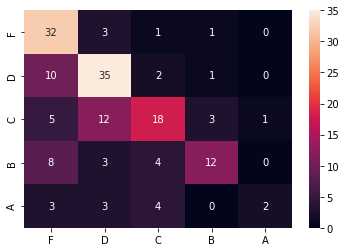

In [82]:
get_performance(Y_test_grades_actual, Y_test_grades_pred)

#### **Aproach 2 - Logistic Regression**
Using cross-entropy loss for the traning algorithm, L2 regularization with dual formulation and saga solver.

In [59]:
clf = LogisticRegression(penalty='l2', random_state=0, solver='saga', max_iter= 500).fit(X_train_scaled, y_grades_train)
Y_test_grades_pred = clf.predict(X_test_scaled)

The macro F1 score for the trivial classifier is -  0.5376588220860666
The accuracy for the trivial classifier is -  0.6073619631901841


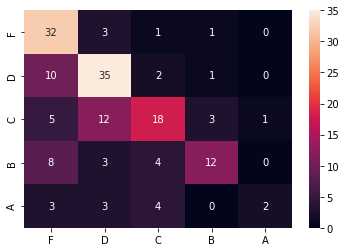

In [84]:
get_performance(Y_test_grades_actual, Y_test_grades_pred)

#### **Approach 3 - Kernel Support Vector Machine**


### **Problem 2**
- Predict final-period academic performance without any prior academic performance data: remove the G1 and G2 columns from the original dataset, then predict G3.

#### Removing categorical non-binary features and grades. 

In [85]:
selected_columns = train_df.loc[:, ~train_df.columns.isin(['Mjob', 'Fjob', 'reason', 'gaurdian', 'G1', 'G2', 'G3'])]
binary_vals = pd.get_dummies(selected_columns)
X_train = binary_vals.to_numpy() #Converting to numpy array for easier processing

y_train = train_df.loc[:, train_df.columns.isin(['G3'])] #Getting corresponding labels
Y_train = y_train['G3'].to_numpy()
y_grades_train = list()
for i in range(len(Y_train)):
    y_grades_train.append(get_grade(Y_train[i]))
y_grades_train = np.array(y_grades_train)

#### Reading in test data and processing it

In [86]:
test_df = pd.read_csv('data/student_performance_test.csv')
selected_columns = test_df.loc[:, ~test_df.columns.isin(['Mjob', 'Fjob', 'reason', 'gaurdian', 'G1', 'G2', 'G3'])]
binary_vals = pd.get_dummies(selected_columns)
X_test = binary_vals.to_numpy() #Converting to numpy array for easier processing

y_test = test_df.loc[:, test_df.columns.isin(['G3'])] #Getting corresponding labels
Y_test = y_test['G3'].to_numpy()
y_grades_test_actual = list()
for i in range(len(Y_test)):
    y_grades_test_actual.append(get_grade(Y_test[i]))
Y_test_grades_actual = np.array(y_grades_test_actual)

#### **Trivial System**

The macro F1 score for the trivial classifier is -  0.11175016436554899
The accuracy for the trivial classifier is -  0.22085889570552147


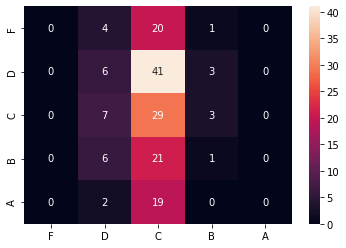

In [89]:
Y_test_grades_pred = trivial_classifier(Y_train, X_test)
get_performance(Y_test_grades_actual, Y_test_grades_pred) 

#### **Reference System - Nearest Means**

The macro F1 score for the trivial classifier is -  0.3601491228070175
The accuracy for the trivial classifier is -  0.36809815950920244


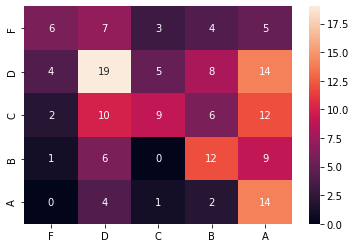

In [90]:
Y_test_grades_pred = nearestMeansClassifier(X_train, Y_train, X_test)
get_performance(Y_test_grades_actual, Y_test_grades_pred)

#### **Approach 1: K Nearest Neighbors**

In [91]:
neigh = KNeighborsClassifier(n_neighbors=3).fit(X_train_scaled, y_grades_train)
Y_test_grades_pred = neigh.predict(X_test_scaled)

The macro F1 score for the trivial classifier is -  0.5553031085336319
The accuracy for the trivial classifier is -  0.588957055214724


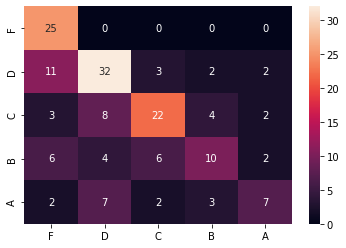

In [92]:
get_performance(Y_test_grades_actual, Y_test_grades_pred)

#### **Aproach 2 - Logistic Regression**
Using cross-entropy loss for the traning algorithm, L2 regularization with dual formulation and saga solver.

In [93]:
clf = LogisticRegression(penalty='l2', random_state=0, solver='saga', max_iter= 500).fit(X_train_scaled, y_grades_train)
Y_test_grades_pred = clf.predict(X_test_scaled)

The macro F1 score for the trivial classifier is -  0.7995146382984941
The accuracy for the trivial classifier is -  0.7914110429447851


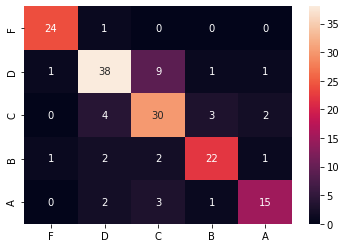

In [94]:
get_performance(Y_test_grades_actual, Y_test_grades_pred)

### **Problem 3**
- Predict final academic performance using all available prior academic performance data: Keep G1 and G2 columns inside the dataset as features, then predict G3.

#### Removing categorical non-binary features.

In [97]:
selected_columns = train_df.loc[:, ~train_df.columns.isin(['Mjob', 'Fjob', 'reason', 'gaurdian', 'G3'])]
binary_vals = pd.get_dummies(selected_columns)
X_train = binary_vals.to_numpy() #Converting to numpy array for easier processing

y_train = train_df.loc[:, train_df.columns.isin(['G3'])] #Getting corresponding labels
Y_train = y_train['G3'].to_numpy()
y_grades_train = list()
for i in range(len(Y_train)):
    y_grades_train.append(get_grade(Y_train[i]))
y_grades_train = np.array(y_grades_train)

#### Reading in test data and processing it

In [98]:
test_df = pd.read_csv('data/student_performance_test.csv')
selected_columns = test_df.loc[:, ~test_df.columns.isin(['Mjob', 'Fjob', 'reason', 'gaurdian', 'G3'])]
binary_vals = pd.get_dummies(selected_columns)
X_test = binary_vals.to_numpy() #Converting to numpy array for easier processing

y_test = test_df.loc[:, test_df.columns.isin(['G3'])] #Getting corresponding labels
Y_test = y_test['G3'].to_numpy()
y_grades_test_actual = list()
for i in range(len(Y_test)):
    y_grades_test_actual.append(get_grade(Y_test[i]))
Y_test_grades_actual = np.array(y_grades_test_actual)

#### **Trivial System**

The macro F1 score for the trivial classifier is -  0.1507890961262554
The accuracy for the trivial classifier is -  0.26993865030674846


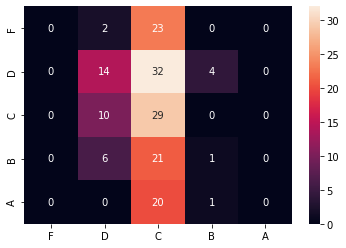

In [99]:
Y_test_grades_pred = trivial_classifier(Y_train, X_test)
get_performance(Y_test_grades_actual, Y_test_grades_pred) 

#### **Reference System - Nearest Means**

The macro F1 score for the trivial classifier is -  0.7349820799017304
The accuracy for the trivial classifier is -  0.7116564417177914


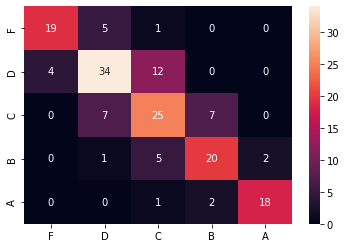

In [100]:
Y_test_grades_pred = nearestMeansClassifier(X_train, Y_train, X_test)
get_performance(Y_test_grades_actual, Y_test_grades_pred)

##### Normalizing data and encoding categorical data

In [101]:
selected_columns = train_df.loc[:, ~train_df.columns.isin(['G3'])]
binary_vals = pd.get_dummies(selected_columns)
X_train = binary_vals.to_numpy()
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)

In [102]:
test_df = pd.read_csv('data/student_performance_test.csv')
selected_columns = test_df.loc[:, ~test_df.columns.isin(['G3'])]
binary_vals = pd.get_dummies(selected_columns)
X_test = binary_vals.to_numpy()
scaler = StandardScaler().fit(X_test)
X_test_scaled = scaler.transform(X_test)

#### **Approach 1: K Nearest Neighbors**

In [103]:
neigh = KNeighborsClassifier(n_neighbors=3).fit(X_train_scaled, y_grades_train)
Y_test_grades_pred = neigh.predict(X_test_scaled)

The macro F1 score for the trivial classifier is -  0.6107155251823286
The accuracy for the trivial classifier is -  0.6257668711656442


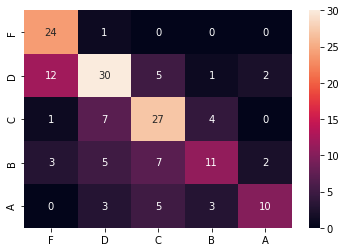

In [104]:
get_performance(Y_test_grades_actual, Y_test_grades_pred)

#### **Aproach 2 - Logistic Regression**
Using cross-entropy loss for the traning algorithm, L2 regularization with dual formulation and saga solver.

In [105]:
clf = LogisticRegression(penalty='l2', random_state=0, solver='saga', max_iter= 500).fit(X_train_scaled, y_grades_train)
Y_test_grades_pred = clf.predict(X_test_scaled)

The macro F1 score for the trivial classifier is -  0.9726635974255021
The accuracy for the trivial classifier is -  0.9693251533742331


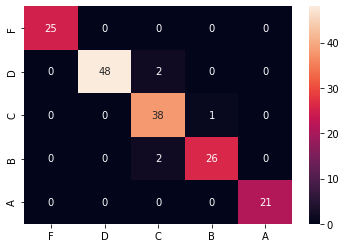

In [106]:
get_performance(Y_test_grades_actual, Y_test_grades_pred)